# Visualization using Plotly

In [1]:
import plotly
import plotly.offline as pyo
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
plotly.__version__

'3.7.1'

In [3]:
orders=pd.read_excel('sales.xls')

In [4]:
orders.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30


In [5]:
orders['Sales'][:5]

0      261.5400
1    10123.0200
2      244.5700
3     4965.7595
4      394.2700
Name: Sales, dtype: float64

# 1)-Basic Plots

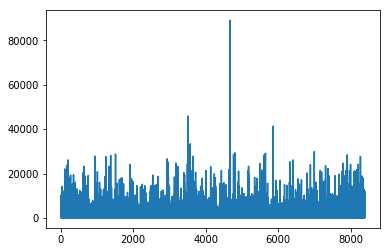

In [6]:
plt.plot(orders.Sales)
plt.show()

### using plotly

In [7]:
pyo.plot([{
    'x' : orders.index,
    'y' : orders.Sales

}])

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\temp-plot.html'

### For order, sales and profit

In [8]:
order_sf=orders[['Sales','Profit']]

In [9]:
order_sf.head()

,Sales,Profit
0,261.5400,-213.2500
1,10123.0200,457.8100
2,244.5700,46.7075
3,4965.7595,1198.9710
4,394.2700,30.9400


In [10]:
pyo.plot([{
    'x' : order_sf.index,
    'y' : order_sf[col],
    'name' : col

}for col in order_sf.columns])     # list comprehension

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\temp-plot.html'

# 2)-Scatter Plot

In [11]:
import plotly.graph_objs as go

In [12]:
pyo.plot([
    go.Scatter(
    x=order_sf.Sales,
    y= order_sf.Profit,
    mode='markers',
    )
])

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\temp-plot.html'

**Other way to plot i.e create an object**

In [13]:
data = [go.Scatter(
    x=order_sf.Sales,
    y= order_sf.Profit,
    mode='markers',
    )]

In [14]:
pyo.plot(data, filename='scatter_plot.html')

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\scatter_plot.html'

# 3) Adding Layout to plotly Chart

In [15]:
data_layer = [go.Scatter(
    x=order_sf.Sales,
    y= order_sf.Profit,
    mode='markers',
    )]

In [16]:
layout=go.Layout(
title='Sales versus profit'
)

In [17]:
figure=go.Figure(data=data_layer,layout=layout)

In [18]:
pyo.plot(figure,filename='adding_layer.html')

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\adding_layer.html'

**Adding steps for x and y axis **

In [19]:
#repeatin step
data = [go.Scatter(
    x=order_sf.Sales,
    y= order_sf.Profit,
    mode='markers',
    )]

In [20]:
# adding x and y axis
layout=go.Layout(
title='Sales versus profit',
xaxis=dict(title='Sales'),
yaxis=dict(title='profit'),
hovermode='closest' # for bringing values of points together as x and y
)

In [21]:
figure=go.Figure(data=data,layout=layout)

In [22]:
pyo.plot(figure,filename='adding_layer2.html')

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\adding_layer2.html'

# 4)-Bar chart

In [23]:
orders['Order Priority'].value_counts()

High             1768
Low              1720
Not Specified    1672
Medium           1631
Critical         1608
Name: Order Priority, dtype: int64

In [24]:
# applying pivot table
order_priority=pd.pivot_table(orders, values='Sales', index='Order Priority',aggfunc='mean')

In [25]:
order_priority

,Sales
Order Priority,
Critical,1694.526538
High,1848.052240
Low,1908.506033
Medium,1755.028890
Not Specified,1661.700536


**plotting**

In [26]:
data=[go.Bar(
            x=order_priority.index, 
            y=order_priority.Sales, 
            name='Average sales by order priority in shipping'
    )]

In [27]:
layout=go.Layout(title='Average sales by order priority in shipping')

In [28]:
fig=go.Figure(data=data, layout=layout)

In [29]:
pyo.plot(fig,filename='bar_chart.html')

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\bar_chart.html'

### Other example is

In [30]:
df = [go.Bar(
            x=['giraffes', 'orangutans', 'monkeys'],
            y=[20, 14, 23]
    )]

pyo.plot(df)

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\temp-plot.html'

**We can save file as well**

In [31]:
pyo.plot(fig, filename='basic-bar-plot.html')

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\basic-bar-plot.html'

# 5)-More on Scatter chart

In [32]:
data = [go.Scatter(
    x=order_sf.Sales,
    y= order_sf.Profit,
    mode='markers',
    marker=dict(
        size=14,
        color='rgb(120,150,180)',
        symbol='square',
        line=dict(
            width=2,
        
        )
    
    )
    )]

In [33]:
layout=go.Layout(
title='Sales versus profit',
xaxis=dict(title='Sales'),
yaxis=dict(title='profit'),
hovermode='closest' 
)

In [34]:
figure=go.Figure(data=data,layout=layout)

In [35]:
pyo.plot(figure,filename='more_scatter_plot.html')

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\more_scatter_plot.html'

# 6)-Line chart

In [36]:
opsd=pd.read_csv('opsd_germany_daily.csv') #Open Power Systems Data

In [37]:
opsd.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [38]:
opsd.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [39]:
opsd.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [40]:
opsd['Date']=pd.to_datetime(opsd.Date, errors='coerce')

In [41]:
opsd.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [42]:
opsd['Date']=opsd.Date.dt.year

In [43]:
opsd.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006,1069.184,NaN,NaN,NaN
1,2006,1380.521,NaN,NaN,NaN
2,2006,1442.533,NaN,NaN,NaN
3,2006,1457.217,NaN,NaN,NaN
4,2006,1477.131,NaN,NaN,NaN


In [44]:
opsd_pivot=pd.pivot_table(opsd, values='Consumption', index='Date',aggfunc='mean')

In [45]:
opsd_pivot.head()

,Consumption
Date,
2006,1339.913797
2007,1360.635197
2008,1354.018787
2009,1259.554597
2010,1338.599178


In [46]:
data=[go.Scatter(
    x=opsd_pivot.index,
    y=opsd_pivot.Consumption,
    mode='lines',
    name='Average energy consumption per year'

)]

In [47]:
layout=go.Layout(title='Average energy consumption per year')

In [48]:
figure= go.Figure(data=data, layout=layout)

In [49]:
pyo.plot(figure,filename='line_chart.html')

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\line_chart.html'

# 7)-multi line chart

In [50]:
opsd_pivot=pd.pivot_table(opsd, values=['Wind','Solar'], index='Date')

In [51]:
opsd_pivot.tail()

,Solar,Wind
Date,,
2013,81.431901,129.309129
2014,89.527017,140.405692
2015,95.635995,212.243819
2016,94.433945,210.404716
2017,98.308611,281.280452


we need to create traces as  we have multi-variables

In [52]:
trace0=go.Scatter(
    x=opsd_pivot.index,
    y=opsd_pivot.Solar,
    mode='lines',
    name='Average Solar energy consumption per year'
)

trace1=go.Scatter(
    x=opsd_pivot.index,
    y=opsd_pivot.Wind,
    mode='lines',
    name='Average Wind energy consumption per year'
)

In [53]:
data=[trace0,trace1]

In [54]:
layout=go.Layout(title='Average energy consumption(solar+wind) per year')

In [55]:
figure= go.Figure(data=data, layout=layout)

In [56]:
pyo.plot(figure,filename='multi-line_chart.html')

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\multi-line_chart.html'

# 8)-Adding points to Plotly line chart

In [57]:
trace0=go.Scatter(
    x=opsd_pivot.index,
    y=opsd_pivot.Solar,
    mode='lines+markers',
    name='Average Solar energy consumption per year'
)

trace1=go.Scatter(
    x=opsd_pivot.index,
    y=opsd_pivot.Wind,
    mode='lines+markers',
    name='Average Wind energy consumption per year'
)

In [58]:
data=[trace0,trace1]

In [59]:
layout=go.Layout(title='Average energy consumption(solar+wind) per year')

In [60]:
figure= go.Figure(data=data, layout=layout)

In [61]:
pyo.plot(figure,filename='adding_points_line_chart.html')

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\adding_points_line_chart.html'

# 9)-Automate multiple lines on the line chart 

Use list comprehension to add all trace point

In [62]:
# change setting of dataframe
opsd_pivot=pd.pivot_table(opsd, values=['Wind','Solar'], columns='Date')

In [63]:
opsd_pivot

Date,2010,2011,2012,2013,2014,2015,2016,2017
Solar,NaN,NaN,76.194896,81.431901,89.527017,95.635995,94.433945,98.308611
Wind,98.38843,120.969646,125.307833,129.309129,140.405692,212.243819,210.404716,281.280452


In [64]:
traces=[go.Scatter(
    x=opsd_pivot.columns,
    y=opsd_pivot.loc[row_name],
    mode='lines+markers',
    name=row_name



)for row_name in opsd_pivot.index]

Above code is for multi-variables and it is doing what trace0 and trace1 were doing. Imagine we have 1....10 variables to be plotted so we are using for loop to deal with all

In [65]:
data=traces

In [66]:
layout=go.Layout(title='Average energy consumption(solar+wind) per year')

In [67]:
figure= go.Figure(data=data, layout=layout)

In [68]:
pyo.plot(figure,filename='Automate_multiple_lines.html')

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\Automate_multiple_lines.html'

# 10)-Create a bar chart

In [69]:
opsd_pivot=pd.pivot_table(opsd, values='Consumption', index='Date',aggfunc='mean')

In [70]:
opsd_pivot.head(10)

,Consumption
Date,
2006,1339.913797
2007,1360.635197
2008,1354.018787
2009,1259.554597
2010,1338.599178
2011,1328.257770
2012,1282.991131
2013,1269.416036
2014,1381.273482


In [71]:
data_bar=[go.Bar(
    x=opsd_pivot.index,
    y=opsd_pivot.Consumption,

)]

In [72]:
layout=go.Layout(title='Average energy consumption per year as BarPlot')

In [73]:
figure= go.Figure(data=data_bar, layout=layout)

In [74]:
pyo.plot(figure,filename='bar_chart.html')

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\bar_chart.html'

# 11)-Creating a group bar chart

In [75]:
opsd_pivot=pd.pivot_table(opsd, values=['Wind','Solar'], index='Date')

In [76]:
opsd_pivot.head()

,Solar,Wind
Date,,
2010,NaN,98.388430
2011,NaN,120.969646
2012,76.194896,125.307833
2013,81.431901,129.309129
2014,89.527017,140.405692


In [77]:
trace0=go.Bar(
    x=opsd_pivot.index,
    y=opsd_pivot.Solar,
    name='Average Solar energy consumption per year'
)

trace1=go.Bar(
    x=opsd_pivot.index,
    y=opsd_pivot.Wind,
    name='Average wind energy consumption per year'
)

In [78]:
data=[trace0,trace1]

In [79]:
layout=go.Layout(title='Average energy consumption(solar+wind) per year as BarPlot')

In [80]:
figure= go.Figure(data=data, layout=layout)

In [81]:
pyo.plot(figure,filename='group_bar_chart.html')

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\group_bar_chart.html'

# 12)-Create a stack bar chart 

Only need changes in layout. Data would remain same

In [82]:
data=[trace0,trace1]

In [83]:
layout=go.Layout(title='Average energy consumption(solar+wind) per year as BarPlot-stack', barmode='stack')

In [84]:
figure= go.Figure(data=data, layout=layout)

In [85]:
pyo.plot(figure)

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\temp-plot.html'

# 13)-Create bar and line combo chart

One plot is bar plot and other scatter i.e line plot

In [86]:
trace0=go.Bar(
    x=opsd_pivot.index,
    y=opsd_pivot.Solar,
    name='Average Solar energy consumption per year'
)

trace1=go.Scatter(
    x=opsd_pivot.index,
    y=opsd_pivot.Wind,
    mode='lines+markers',
    name='Average Wind energy consumption per year'
)

notice one is scatter plot and other is bar plot

In [87]:
data=[trace0,trace1]

In [88]:
layout=go.Layout(title='Average energy consumption(solar+wind) per year')

In [89]:
figure= go.Figure(data=data, layout=layout)

In [90]:
pyo.plot(figure)

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\temp-plot.html'

# 14)-Customize colors

In [91]:
trace0=go.Bar(
    x=opsd_pivot.index,
    y=opsd_pivot.Solar,
    name='Average Solar energy consumption per year',
    marker=dict(color='rgb(150,180,220)')
)

trace1=go.Scatter(
    x=opsd_pivot.index,
    y=opsd_pivot.Wind,
    mode='lines+markers',
    name='Average Wind energy consumption per year'
)

In [92]:
data=[trace0,trace1]

In [93]:
layout=go.Layout(title='Average energy consumption(solar+wind) per year')

In [94]:
figure= go.Figure(data=data, layout=layout)

In [95]:
pyo.plot(figure)

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\temp-plot.html'

# 15)- Create Plolty Bubble Chart

In [96]:
#back to sales data
orders=pd.read_excel('sales.xls')

In [97]:
orders.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30


Creating a bubble chart on sales, profit and discount

In [98]:
#repeatin step
data = [go.Scatter(
    x=orders.Sales,
    y= orders.Profit,
    text=orders['Customer Name'],
    mode='markers',
    marker=dict(size=100*orders['Discount'])
    )]

In [99]:
layout=go.Layout(
title='Sales versus profit',
xaxis=dict(title='Sales'),
yaxis=dict(title='profit'),
hovermode='closest' 
)

In [100]:
figure= go.Figure(data=data, layout=layout)

In [101]:
pyo.plot(figure)

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\temp-plot.html'

# 16)-Create plotly bubble chart by categories

For groupby plotting, we will create traces.<br>

In this case, we are interested in high order priority 

In [102]:
#[orders['Order Priority'] == 'High']

In [103]:
trace0=go.Scatter(
    x=orders['Sales'][orders['Order Priority'] == 'High'],
    y= orders['Profit'][orders['Order Priority'] == 'High'],
    name='High',
    mode='markers',
    marker=dict(size=100*orders['Discount'][orders['Order Priority'] == 'High'])
    )

In [104]:
trace1=go.Scatter(
    x=orders['Sales'][orders['Order Priority'] == 'Medium'],
    y= orders['Profit'][orders['Order Priority'] == 'Medium'],
    name='Medium',
    mode='markers',
    marker=dict(size=100*orders['Discount'][orders['Order Priority'] == 'Medium'])
    )

In [105]:
trace2=go.Scatter(
    x=orders['Sales'][orders['Order Priority'] == 'Low'],
    y= orders['Profit'][orders['Order Priority'] == 'Low'],
    name='Low',
    mode='markers',
    marker=dict(size=100*orders['Discount'][orders['Order Priority'] == 'Low'])
    )

In [106]:
data=[trace0,trace1,trace2]

In [107]:
layout=go.Layout(
title='Sales versus profit',
xaxis=dict(title='Sales'),
yaxis=dict(title='profit'),
hovermode='closest' 
)

In [108]:
figure= go.Figure(data=data, layout=layout)

In [109]:
pyo.plot(figure)

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\temp-plot.html'

# 17)-Histogram

In [110]:
trace0=go.Histogram(
    x=orders['Sales'],
    name='Sales',
    opacity = .5
    )

trace1=go.Histogram(
    x=orders['Profit'],
    name='Profit',
    opacity = .5
    )

In [111]:
data=[trace0,trace1]

In [112]:
layout=go.Layout(title='Sales versus profit')

In [113]:
figure= go.Figure(data=data, layout=layout)

In [114]:
pyo.plot(figure)

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\temp-plot.html'

we may add more traces to have multi-histogram

# 18)-Box Plot chart

In [115]:
orders['Customer Segment'].value_counts()

Corporate         3076
Home Office       2032
Consumer          1649
Small Business    1642
Name: Customer Segment, dtype: int64

In [116]:
#orders['Customer Segment']=='Corporate'

In [117]:
Corporate=orders.Sales[orders['Customer Segment']=='Corporate']

In [118]:
Corporate[:5]

3     4965.7595
6       93.5400
7      905.0800
8     2781.8200
19     834.9040
Name: Sales, dtype: float64

In [119]:
Home_Office = orders.Sales[orders['Customer Segment']=='Home Office']

In [120]:
Consumer=orders.Sales[orders['Customer Segment']=='Consumer']

In [121]:
Small_Business=orders.Sales[orders['Customer Segment']=='Small Business']

### Now we will create four traces

In [122]:
trace0=go.Box(
    y=Corporate,
    name='Corporate',
    )

trace1=go.Box(
    y=Home_Office,
    name='Home Office',
    )

trace2=go.Box(
    y=Consumer,
    name='Consumer',
    )

trace3=go.Box(
    y=Small_Business,
    name='Small Business',
    )

In [123]:
data=[trace0,trace1,trace2,trace3]

In [124]:
layout=go.Layout(title='Distribution of customer sagement in terms of Sales')

In [125]:
figure= go.Figure(data=data, layout=layout)

In [126]:
pyo.plot(figure)

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\temp-plot.html'

# 19)- scatter plot matrix

In [127]:
import plotly.figure_factory as ff
import numpy as np

In [128]:
orders_data=orders.loc[:,['Sales','Profit','Discount']]

In [129]:
orders_data.head()

,Sales,Profit,Discount
0,261.5400,-213.2500,0.04
1,10123.0200,457.8100,0.07
2,244.5700,46.7075,0.01
3,4965.7595,1198.9710,0.08
4,394.2700,30.9400,0.08


In [130]:
orders_data['index']=np.arange(1,len(orders_data)+1)

In [131]:
orders_data.head()

,Sales,Profit,Discount,index
0,261.5400,-213.2500,0.04,1
1,10123.0200,457.8100,0.07,2
2,244.5700,46.7075,0.01,3
3,4965.7595,1198.9710,0.08,4
4,394.2700,30.9400,0.08,5


In [132]:
fig=ff.create_scatterplotmatrix(orders_data,diag='box', index='index', colormap='Portland',colormap_type='cat')

In [133]:
pyo.plot(fig)

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\temp-plot.html'

# 20)-Add dimension to scatterplot matrix 

We will check all three variables and their value in group with another variables i.e order priority 

In [134]:
orders_data=orders.loc[:,['Sales','Profit','Discount','Order Priority']]

In [135]:
orders_data.head()

,Sales,Profit,Discount,Order Priority
0,261.5400,-213.2500,0.04,Low
1,10123.0200,457.8100,0.07,High
2,244.5700,46.7075,0.01,High
3,4965.7595,1198.9710,0.08,High
4,394.2700,30.9400,0.08,Not Specified


We will groupby order priority so, we won't need index.

In [136]:
fig=ff.create_scatterplotmatrix(orders_data,diag='box', index='Order Priority', colormap='Portland',colormap_type='cat')

In [137]:
pyo.plot(fig)

'file://C:\\Users\\Hassan\\Documents\\Python work\\Learning Projects\\Visualization\\plotly\\temp-plot.html'